### Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('../data/train_preprocessed.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,rez_esc-missing
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,...,1849,1,100,0,1.000000,0.0,100.0,1849,4,False
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,4489,1,144,0,1.000000,64.0,144.0,4489,4,False
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,...,8464,1,0,0,0.250000,64.0,121.0,8464,4,False
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,289,16,121,4,1.777778,1.0,121.0,289,4,False
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,1369,16,121,4,1.777778,1.0,121.0,1369,4,False


# Khám phá dữ liệu

### Số lượng các hộ gia đình với số lượng thành viên trong hộ gia đình tương ứng

Text(0, 0.5, 'Number')

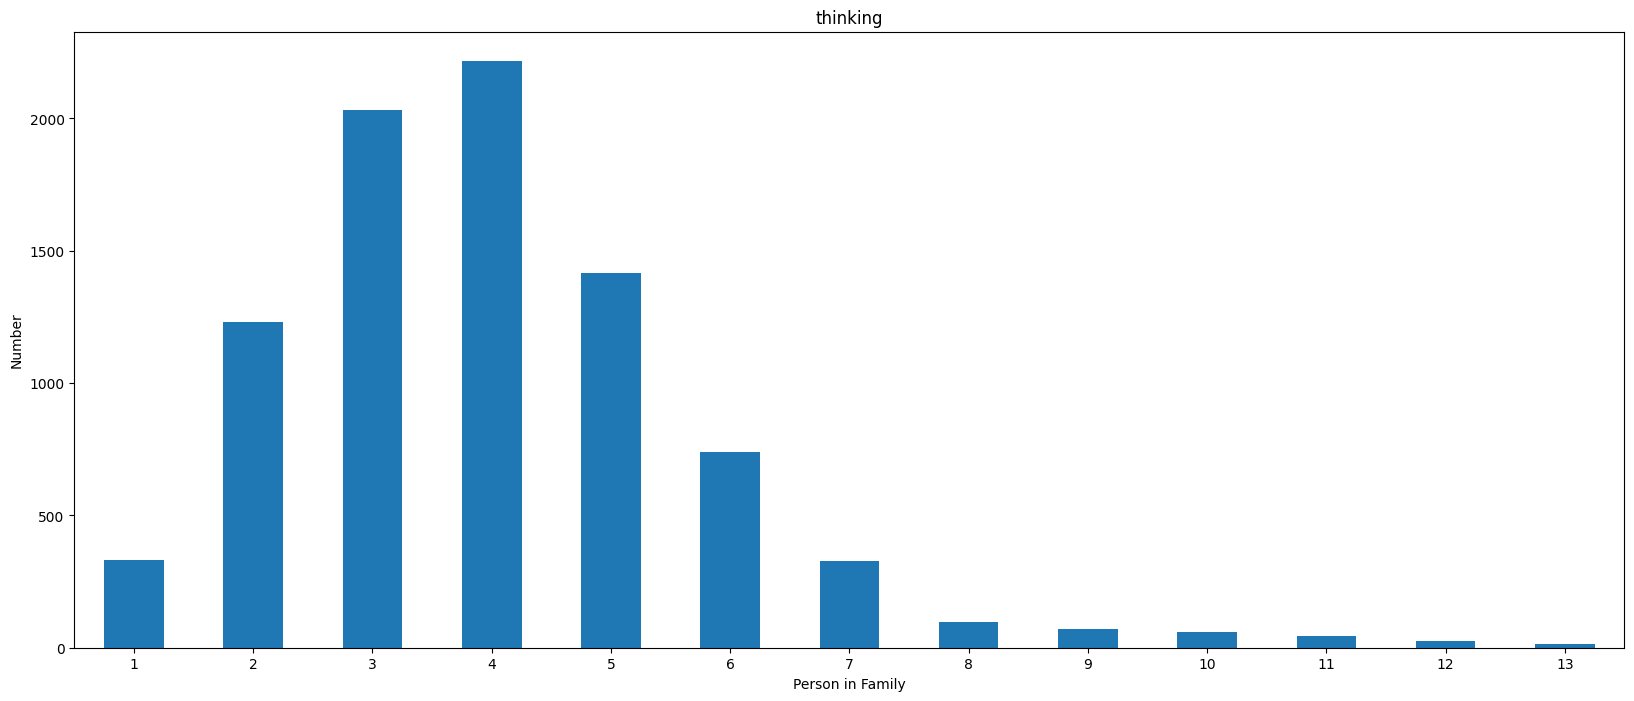

In [3]:
num_people = train['r4t3'].value_counts()
num_people = num_people.sort_index()

num_people.plot(kind='bar', figsize=(20, 8))
plt.title('thinking')
plt.xlabel('Person in Family')
plt.xticks(rotation=0)
plt.ylabel('Number')

#### Nhận xét: 
- Dựa vào biểu đồ, ta thấy rằng số lượng thành viên trong gia đình ở Costa Rica rất đa dạng, từ 1 người cho đến 13 người trong một gia đình.
- Đa số các hộ gia đình có từ 2 đến 5 thành viên là chính, đặc biệt là hộ gia đình có 3, 4 thành viên. 
- Từ 8 đến 13 thành viên trong một hộ gia đình, ta thấy có rất ít hộ. ít nhất là hộ gia đình có 13 thành viên

Text(0, 0.5, 'Number of household')

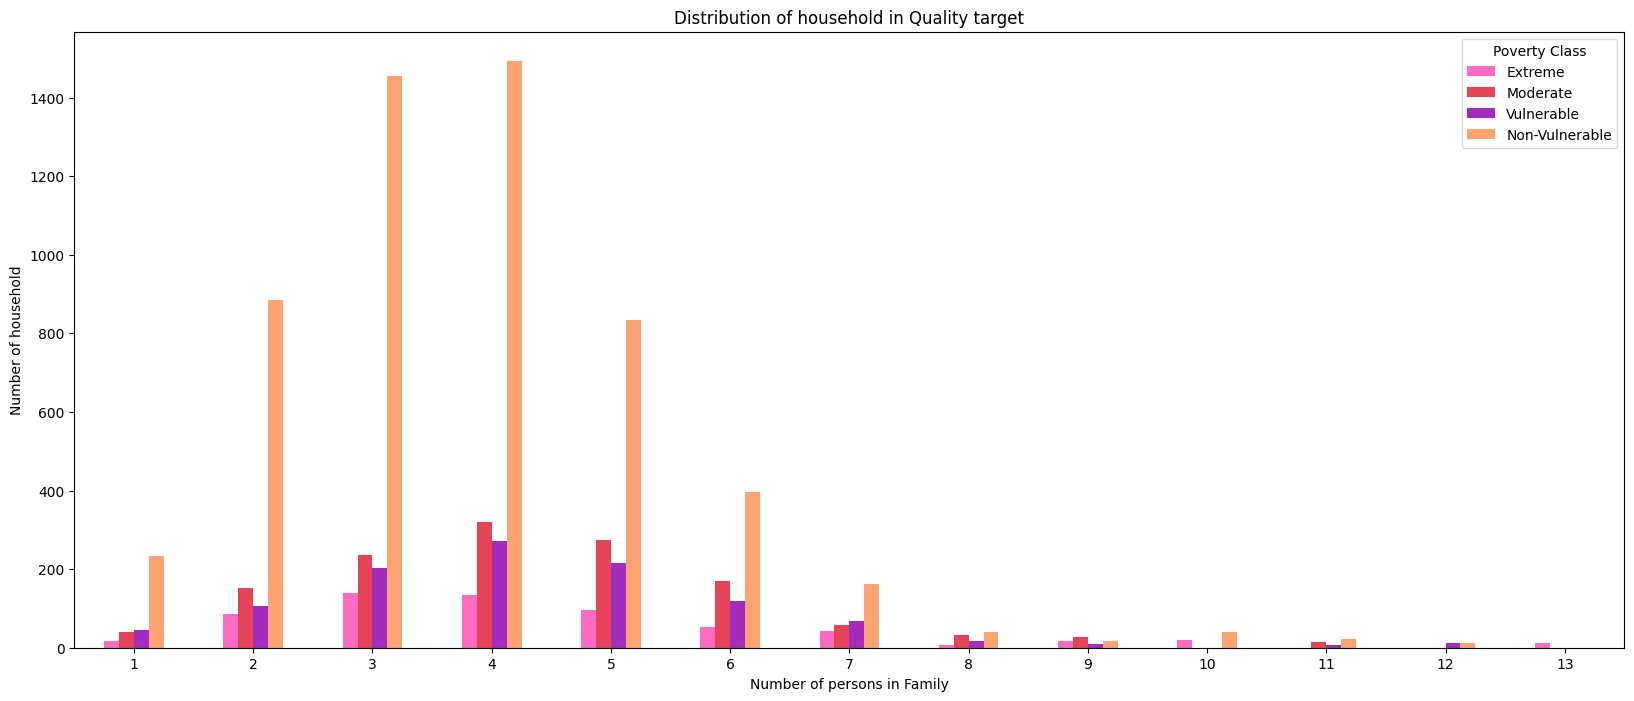

In [4]:
current = train.pivot_table(index='r4t3', columns='Target', aggfunc='size', fill_value=0)
current

current.plot(kind='bar', figsize=(20, 8), color=['#fd6bc3', '#e44358', '#a22cbd', '#fca371'])
plt.title('Distribution of household in Quality target')
plt.legend(labels=['Extreme', 'Moderate', 'Vulnerable', 'Non-Vulnerable'], title='Poverty Class', loc='upper right')
plt.xlabel('Number of persons in Family')
plt.xticks(rotation=0)
plt.ylabel('Number of household')

#### Nhận xét:
- Tiếp nối từ biểu đồ trên, kết hợp thêm cột `'Target'`, ta sẽ thấy được sự phân bố về kinh tế của các hộ gia đình.
- Ở các hộ gia đình có từ 7 thành viên trở xuống, tỉ lệ các hộ gia đình thuộc tầng lớp `Non-vulnerable` là áp đảo hoàn toàn so với các mức kinh tế khác. Theo sau đó đa phần là các hộ thuộc `Moderate`. Tuy nhiên với số lượng thành viên trong gia đình là 1 và 7 thì xếp thứ nhì chính là các hộ thuộc `Vulnerable`.
- Từ hộ gia đình có 8 thành viên trở đi, ta thấy có sự chuyển biến nhẹ. Hộ gia đình thuộc nhóm `Non-vulnerable` không còn luôn luôn chiếm ưu thế nữa. Thay vào đó nổi bật là `Moderate` và `Extreme`.
- Có thể thấy được rằng, với các hộ gia đình càng đông thành viên, thì thường họ sẽ có xu hướng khó khăn hơn về mặt kinh tế so với các hộ gia đình ít thành viên.

### Chất liệu làm tường

In [5]:
wall_mat = train[['paredblolad','paredzocalo','paredpreb','pareddes','paredmad','paredzinc','paredfibras','paredother']]
wall_mat

,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother
0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
8603,1,0,0,0,0,0,0,0
8604,1,0,0,0,0,0,0,0
8605,1,0,0,0,0,0,0,0
8606,1,0,0,0,0,0,0,0


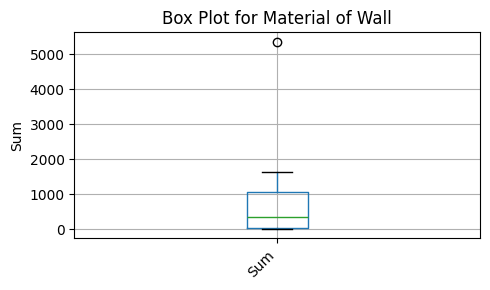

In [6]:
columns = wall_mat.columns
wall_mat_col = ['block or brick', 'socket', 'prefabricated or cement', 'waste material', 'wood','zink', 'natural fibers', 'other']
column_sums = {}
for column,col in zip(columns, wall_mat_col):
    column_sum = wall_mat[column].sum()
    column_sums[col] = column_sum
wall_mat_df = pd.DataFrame(list(column_sums.items()), columns=['Material', 'Sum'])
wall_mat_df.set_index('Material', inplace= True)

plt.figure(figsize=(5, 3))
wall_mat_df.boxplot(column='Sum')
plt.title('Box Plot for Material of Wall')
plt.ylabel('Sum')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Chất liệu làm sàn 

In [7]:
floor_mat = train[['pisomoscer','pisocemento','pisoother','pisonatur','pisomadera']]
floor_mat

,pisomoscer,pisocemento,pisoother,pisonatur,pisomadera
0,1,0,0,0,0
1,0,0,0,0,1
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
8603,0,1,0,0,0
8604,0,1,0,0,0
8605,0,1,0,0,0
8606,0,1,0,0,0


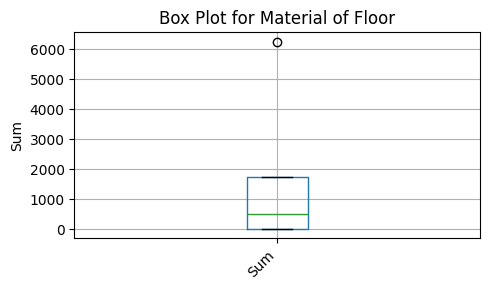

In [8]:
columns = floor_mat.columns
floor_mat_col = ['mosaic, ceramic, terrazo', 'cement', 'other', 'natural material', 'wood']
column_sums = {}
for column,col in zip(columns, floor_mat_col):
    column_sum = floor_mat[column].sum()
    column_sums[col] = column_sum
floor_mat_df = pd.DataFrame(list(column_sums.items()), columns=['Material', 'Sum'])
floor_mat_df.set_index('Material', inplace= True)

plt.figure(figsize=(5, 3))
floor_mat_df.boxplot(column='Sum')
plt.title('Box Plot for Material of Floor')
plt.ylabel('Sum')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Chất liệu làm mái

In [9]:
roof_mat = train[['techozinc','techoentrepiso','techocane','techootro']]
roof_mat

,techozinc,techoentrepiso,techocane,techootro
0,0,1,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
8603,1,0,0,0
8604,1,0,0,0
8605,1,0,0,0
8606,1,0,0,0


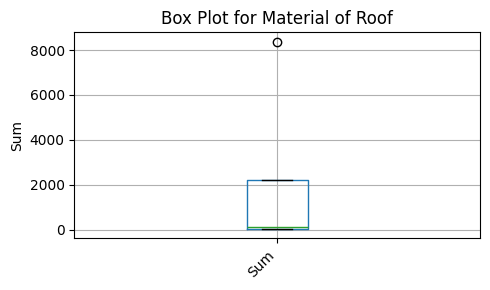

In [10]:
columns = roof_mat.columns
roof_mat_col = ['metal foil or zink', 'fiber cement, mezzanine', 'natural fibers', 'other']
column_sums = {}
for column,col in zip(columns, roof_mat_col):
    column_sum = roof_mat[column].sum()
    column_sums[col] = column_sum
roof_mat_df = pd.DataFrame(list(column_sums.items()), columns=['Material', 'Sum'])
roof_mat_df.set_index('Material', inplace= True)

plt.figure(figsize=(5, 3))
roof_mat_df.boxplot(column='Sum')
plt.title('Box Plot for Material of Roof')
plt.ylabel('Sum')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()